In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
filename = 'btc_data_2020-01-11_2020-01-22.csv'

#df = pd.read_csv(filename)
df_1 = pd.read_csv('data/btc_data_2019-04-10_2019-04-20.csv').sort_values('time')
df_2 = pd.read_csv('data/btc_data_2019-04-21_2019-05-01.csv').sort_values('time')
df_3 = pd.read_csv('data/btc_data_2019-05-02_2019-05-12.csv').sort_values('time')
df_4 = pd.read_csv('data/btc_data_2019-05-13_2019-05-23.csv').sort_values('time')
df_5 = pd.read_csv('data/btc_data_2019-05-24_2019-06-03.csv').sort_values('time')
df_6 = pd.read_csv('data/btc_data_2019-06-04_2019-06-14.csv').sort_values('time')
df_7 = pd.read_csv('data/btc_data_2019-06-15_2019-06-25.csv').sort_values('time')
df_8 = pd.read_csv('data/btc_data_2019-06-26_2019-07-06.csv').sort_values('time')
df_9 = pd.read_csv('data/btc_data_2019-07-07_2019-07-17.csv').sort_values('time')
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9], axis=0).reset_index(drop=True)

In [36]:
len(df)

2167

In [37]:
df.head()

,time,low,high,open,close,volume
0,2019-04-10 00:00:00,5164.49,5219.34,5187.21,5203.55,596.563646
1,2019-04-10 01:00:00,5202.00,5245.88,5203.55,5236.33,584.110252
2,2019-04-10 02:00:00,5224.94,5243.13,5236.83,5229.00,246.583672
3,2019-04-10 03:00:00,5217.17,5235.00,5231.00,5219.15,210.437607
4,2019-04-10 04:00:00,5219.14,5240.00,5219.15,5232.63,199.742684


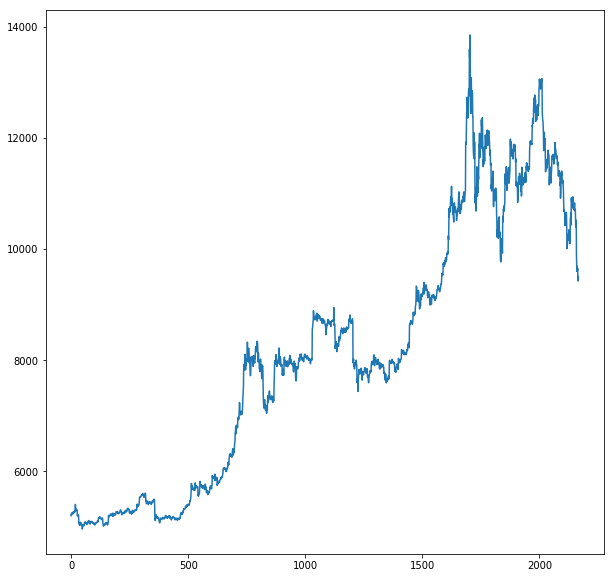

In [38]:
plt.figure(figsize=(10, 10))
plt.plot(df.close)

In [39]:
X = np.array(df['close'])

In [40]:
n = len(X)
X_ret = np.zeros((n, 1))
for i in range(1, n):
    X_ret[i] = np.log(X[i] / X[i-1])*100

In [41]:
offset = 3
X_var = np.zeros((n, 1))
for i in range(offset+1, n):
    X_tmp = X[i-offset:i]
    X_var[i] = np.var(X_tmp)/np.mean(X_tmp)

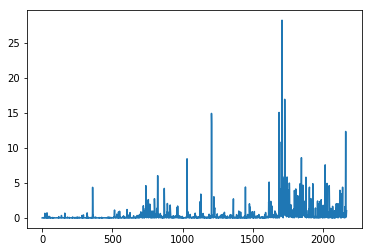

In [42]:
plt.plot(X_var)

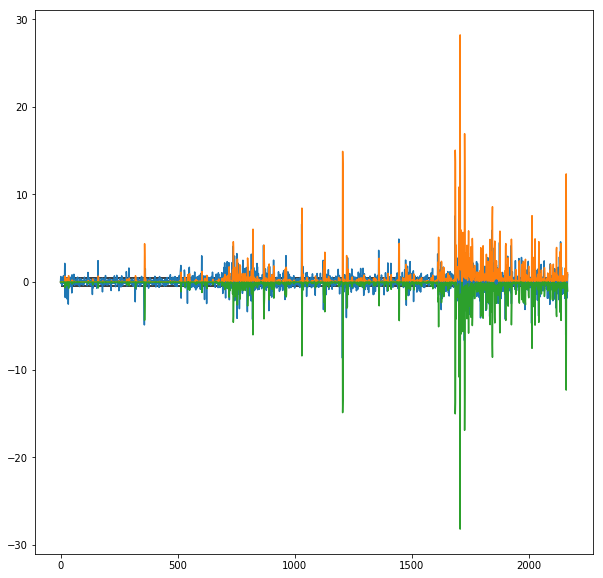

In [43]:
lower_lim = -0.5
upper_lim = 0.5
 

plt.figure(figsize=(10, 10))

plt.plot(X_ret)
plt.plot(X_var)
plt.plot(-1*X_var)
plt.hlines(upper_lim, 0, len(X_ret))
plt.hlines(lower_lim, 0, len(X_ret))

In [44]:
print('Length of dataframe: {}'.format(len(df)))
print('Length of X_ret: {}'.format(len(X_ret)))

Length of dataframe: 2167
Length of X_ret: 2167


In [45]:
lower_lim = -0.989
upper_lim = 0.579       

btc_wallet = 0.0
usd_wallet = 100.0

maker_fee = 0.005
taker_fee = 0.005

buy_x = []
buy_y = []
sell_x = []
sell_y = []

for i in range(len(X_ret)):
    #print('Return: {}%'.format(X_ret[i]))
    #print('BTC Price ${}'.format(df.loc[i, 'close']))
    if X_ret[i] >= X_var[i]+upper_lim:
        if btc_wallet > 0:
            usd_wallet = btc_wallet * df.loc[i, 'close']*(1-maker_fee)
            btc_wallet = 0.0
            print('Sell BTC at ${}'.format(df.loc[i, 'close']))
            sell_x.append(i)
            sell_y.append(df.loc[i, 'close'])
    elif X_ret[i] <= -1*X_var[i]+lower_lim:
        if usd_wallet > 0:
            btc_wallet = (usd_wallet / df.loc[i, 'close'])*(1-taker_fee)
            usd_wallet = 0
            print('Buy BTC at ${}'.format(df.loc[i, 'close']))
            buy_x.append(i)
            buy_y.append(df.loc[i, 'close'])
            
print('Final BTC Wallet (from USD): {}'.format(btc_wallet*df.loc[len(df)-1, 'close']))
print('Final USD Wallet: {}'.format(usd_wallet))

Buy BTC at $5307.94
Sell BTC at $5002.78
Buy BTC at $5059.94
Sell BTC at $5208.37
Buy BTC at $5191.33
Sell BTC at $5269.23
Buy BTC at $5467.13
Sell BTC at $5457.83
Buy BTC at $5388.97
Sell BTC at $5222.73
Buy BTC at $5570.55
Sell BTC at $5689.5
Buy BTC at $5832.73
Sell BTC at $5887.0
Buy BTC at $5748.45
Sell BTC at $5935.46
Buy BTC at $6293.31
Sell BTC at $6390.68
Buy BTC at $6677.41
Sell BTC at $6785.34
Buy BTC at $7075.22
Sell BTC at $7081.01
Buy BTC at $7986.74
Sell BTC at $8214.99
Buy BTC at $7820.0
Sell BTC at $7925.0
Buy BTC at $7912.57
Sell BTC at $8084.93
Buy BTC at $7971.21
Sell BTC at $7858.99
Buy BTC at $7668.02
Sell BTC at $7915.52
Buy BTC at $7484.69
Sell BTC at $7286.05
Buy BTC at $7936.14
Sell BTC at $8061.07
Buy BTC at $7896.03
Sell BTC at $7819.56
Buy BTC at $7827.01
Sell BTC at $7877.29
Buy BTC at $8702.59
Sell BTC at $8806.97
Buy BTC at $8457.78
Sell BTC at $8732.37
Buy BTC at $8667.82
Sell BTC at $8304.68
Buy BTC at $8692.63
Sell BTC at $7931.56
Buy BTC at $7597.58


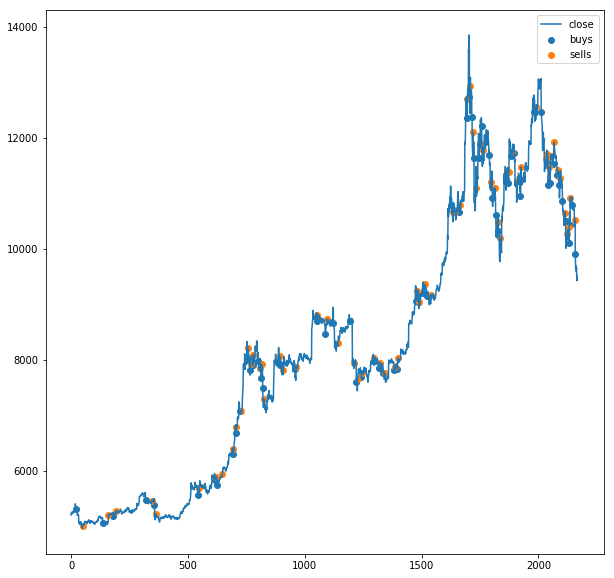

In [46]:
plt.figure(figsize=(10, 10))
plt.plot(df.close)
plt.scatter(buy_x, buy_y, label='buys')
plt.scatter(sell_x, sell_y, label='sells')
plt.legend()

In [33]:
def simulate_scenario(X, lower_lim, upper_lim, starting_usd):
    maker_fee = 0.005
    taker_fee = 0.005

    btc_wallet = 0.0
    usd_wallet = starting_usd
    trade_count = 0
    
    X_ret = calc_returns(X)
    X_var = calc_var(X)
    
    for i in range(len(X_ret)):
        #print('Return: {}%'.format(X_ret[i]))
        #print('BTC Price ${}'.format(df.loc[i, 'close']))
        if X_ret[i] >= X_var[i]+upper_lim:
            if btc_wallet > 0:
                usd_wallet = btc_wallet * X[i] * (1-maker_fee)
                btc_wallet = 0.0
                trade_count += 1
                #print('Sell BTC at ${}'.format(df.loc[i, 'close']))
        elif X_ret[i] <= -1*X_var[i]+lower_lim:
            if usd_wallet > 0:
                btc_wallet = (usd_wallet / X[i]) * (1-taker_fee)
                usd_wallet = 0
                trade_count += 1
                #print('Buy BTC at ${}'.format(df.loc[i, 'close']))
    if usd_wallet > 0:
        final_usd = usd_wallet
    else:
        final_usd = btc_wallet * X[len(X)-1]
    #print('Final BTC Wallet (from USD): {}'.format(btc_wallet*df.loc[len(df)-1, 'close']))
    #print('Final USD Wallet: {}'.format(usd_wallet))
    return final_usd - starting_usd, (final_usd - starting_usd) / starting_usd * 100, trade_count

def calc_returns(X):
    n = len(X)
    X_ret = np.zeros((n, 1))
    for i in range(1, n):
        X_ret[i] = np.log(X[i] / X[i-1])*100
    return X_ret

def calc_var(X):
    n = len(X)    
    offset = 3
    X_var = np.zeros((n, 1))
    for i in range(offset+1, n):
        X_tmp = X[i-offset:i]
        X_var[i] = np.var(X_tmp)/np.mean(X_tmp)
    return X_var

def optimize_constraints(X, lower_bound, upper_bound):
    upper_lims = np.arange(lower_bound, upper_bound, 0.1)
    lower_lims = -1*upper_lims
    lim_lower = []
    lim_upper = []
    profit = []
    returns = []
    trade_count = []

    for upper_lim in upper_lims:
        for lower_lim in lower_lims:
            lim_lower.append(lower_lim)
            lim_upper.append(upper_lim)
            prof, ret, tc = (simulate_scenario(X, lower_lim, upper_lim, 1000))
            profit.append(prof)
            returns.append(ret)
            trade_count.append(tc)
            
    results = pd.DataFrame({'lower_limit': lim_lower, 'upper_limit': lim_upper, 
                        'profit': profit, 'return': returns, 'trade_count': trade_count})
    
    best_lower_lim = results.sort_values('return', ascending=False).reset_index(drop=True).loc[0, 'lower_limit']
    best_upper_lim = results.sort_values('return', ascending=False).reset_index(drop=True).loc[0, 'upper_limit']
    return best_lower_lim, best_upper_lim

Buy BTC at $5270.21
Sell BTC at $5093.4
Buy BTC at $5063.95
Sell BTC at $5273.73
Buy BTC at $5309.98
Sell BTC at $5255.52
Buy BTC at $5319.99
Sell BTC at $5674.28
Buy BTC at $5676.99
Sell BTC at $5712.32
Buy BTC at $5765.0
Sell BTC at $5786.0
Buy BTC at $5770.01
Sell BTC at $5924.21
Buy BTC at $5889.45
Sell BTC at $6051.22
Buy BTC at $6043.07
Sell BTC at $6484.43
Buy BTC at $7219.95
Sell BTC at $7830.0
Buy BTC at $7821.64
Sell BTC at $7865.52
Buy BTC at $7934.74
Sell BTC at $7986.56
Buy BTC at $7912.99
Sell BTC at $8325.0
Buy BTC at $7986.74
Sell BTC at $8084.93
Buy BTC at $7983.51
Sell BTC at $8126.16
Buy BTC at $8000.01
Sell BTC at $7862.64
Buy BTC at $7835.81
Sell BTC at $7915.52
Buy BTC at $7484.69
Sell BTC at $7286.05
Buy BTC at $7298.84
Sell BTC at $7604.99
Buy BTC at $7941.92
Sell BTC at $7979.51
Buy BTC at $8085.46
Sell BTC at $8061.07
Buy BTC at $7896.03
Sell BTC at $7999.54
Buy BTC at $7931.89
Sell BTC at $7877.29
Buy BTC at $8058.3
Sell BTC at $8566.0
Buy BTC at $8837.78
Sel

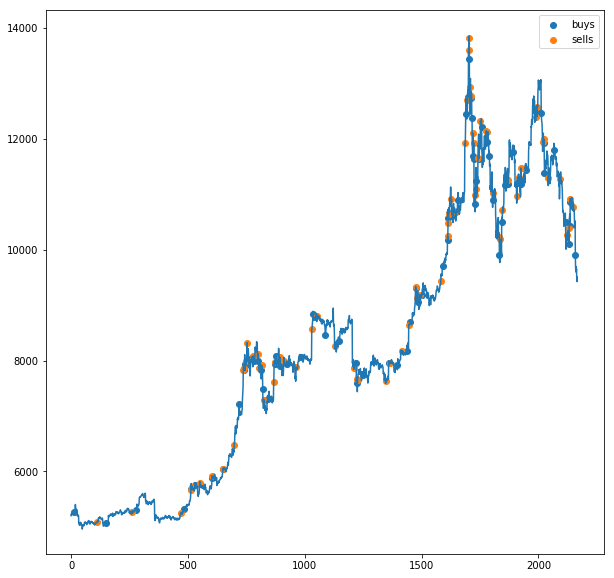

In [47]:
constraints = []
step_size = 10
btc_wallet = 0.0
starting_usd = 10000
usd_wallet = starting_usd
trade_count = 0
maker_fee = 0.005
taker_fee = 0.005

buy_x = []
buy_y = []
sell_x = []
sell_y = []

for i in range(step_size+1, len(X)):
    #print('i: {}'.format(i))
    X_tmp = X[i-step_size:i]
    constraints.append(optimize_constraints(X_tmp, 0.1, 3.0))
    #print('Constraints found: {}'.format(constraints[-1]))
    lower_lim = constraints[-1][0]
    upper_lim = constraints[-1][1]
    X_var = calc_var(X_tmp)
    X_ret = calc_returns(X_tmp)
    """
    plt.plot(X_ret)
    plt.plot(X_var)
    plt.plot(-1*X_var)
    plt.hlines(upper_lim, 0, len(X_ret))
    plt.hlines(lower_lim, 0, len(X_ret))
    plt.show()
    """
    #print('X_ret: {}'.format(X_ret[-1]))
    #print('X_var: {}'.format(X_var[-1]+upper_lim))
    if X_ret[-1] >= upper_lim:
        if btc_wallet > 0:
            usd_wallet = btc_wallet * X_tmp[-1] * (1-maker_fee)
            btc_wallet = 0.0
            trade_count += 1
            print('Sell BTC at ${}'.format(X_tmp[-1]))
            sell_x.append(i-1)
            sell_y.append(X_tmp[-1])
    elif X_ret[-1] <= lower_lim:
        if usd_wallet > 0:
            btc_wallet = (usd_wallet / X_tmp[-1]) * (1-taker_fee)
            usd_wallet = 0
            trade_count += 1
            print('Buy BTC at ${}'.format(X_tmp[-1]))
            buy_x.append(i-1)
            buy_y.append(X_tmp[-1])

plt.figure(figsize=(10, 10))
plt.plot(X)
plt.scatter(buy_x, buy_y, label='buys')
plt.scatter(sell_x, sell_y, label='sells')
plt.legend()
            
if usd_wallet > 0:
    final_usd = usd_wallet
    roi_model = (final_usd - starting_usd)/starting_usd
else:
    final_usd = btc_wallet * X[len(X)-1]
    roi_model = (final_usd - starting_usd)/starting_usd
    
roi_mkt = (X[-1] - X[0])/X[0]    

print('Starting USD: ${}'.format(starting_usd))
print('Final BTC Wallet (from USD): ${}'.format(btc_wallet*df.loc[len(df)-1, 'close']))
print('Final USD Wallet: ${}'.format(usd_wallet))
print('Model ROI: {}%'.format(roi_model))
print('Market ROI: {}%'.format(roi_mkt))

Starting USD: $10000
Final BTC Wallet (from USD): $9890.67433457844
Final USD Wallet: $0
Model ROI: -0.01093256654215602%
Market ROI: -0.03715578392089841%


In [14]:
optimize_constraints(X, 0.5, 1.5)

(-0.5, 1.0000000000000004)

In [16]:
lim_lower = []
lim_upper = []
profit = []
returns = []
trade_count = []

for upper_lim in upper_lims:
    for lower_lim in lower_lims:
        lim_lower.append(lower_lim)
        lim_upper.append(upper_lim)
        prof, ret, tc = (simulate_scenario(lower_lim, upper_lim, 1000))
        profit.append(prof)
        returns.append(ret)
        trade_count.append(tc)
        
results = pd.DataFrame({'lower_limit': lim_lower, 'upper_limit': lim_upper, 
                        'profit': profit, 'return': returns, 'trade_count': trade_count})

In [33]:
print(results.sort_values('return', ascending=False).loc[0, 'lower_limit'])

-0.1


In [ ]:
### Best Results:
# -0.59 	1.42 	
# -1.06         1.82

In [17]:
max_offset = 5

for offset in range(1, max_offset+1):
    n = len(X)
    X_ret = np.zeros((n, 1))
    for i in range(1, n):
        X_ret[i] = np.log(X[i] / X[i-1])*100

    # offset = 5
    X_var = np.zeros((n, 1))
    for i in range(offset+1, n):
        X_tmp = X[i-offset:i]
        X_var[i] = np.var(X_tmp)/np.mean(X_tmp)

    upper_lims = np.arange(0.5, 1.5, 0.01)
    lower_lims = -1*upper_lims

    lim_lower = []
    lim_upper = []
    profit = []
    returns = []
    trade_count = []

    for upper_lim in upper_lims:
        for lower_lim in lower_lims:
            lim_lower.append(lower_lim)
            lim_upper.append(upper_lim)
            prof, ret, tc = (simulate_scenario(lower_lim, upper_lim, 1000))
            profit.append(prof)
            returns.append(ret)
            trade_count.append(tc)

    results = pd.DataFrame({'lower_limit': lim_lower, 'upper_limit': lim_upper, 
                            'profit': profit, 'return': returns, 'trade_count': trade_count})
    print('\nOffset: {}'.format(offset))
    print(results.sort_values('return', ascending=False)[:1])

TypeError: simulate_scenario() missing 1 required positional argument: 'starting_usd'

In [3]:
from datetime import datetime, timedelta

In [17]:
start_date = '2019-01-25'
end_date = '2020-02-01'
date_fmt = '%Y-%m-%d'

start_dt = datetime.strptime(start_date, date_fmt)
end_dt = datetime.strptime(end_date, date_fmt)

In [18]:
while start_dt < end_dt:
    if (end_dt - start_dt).days > 10:
        int_dt = start_dt + timedelta(days=10)
        # get data
        print('Got data for ({}, {})'.format(datetime.strftime(start_dt, date_fmt), datetime.strftime(int_dt, date_fmt)))
        start_dt = int_dt + timedelta(days=1)
    else:
        print('Got data for ({}, {})'.format(datetime.strftime(start_dt, date_fmt), datetime.strftime(end_dt, date_fmt)))
        # get data
        start_dt = end_dt

Got data for (2019-01-25, 2019-02-04)
Got data for (2019-02-05, 2019-02-15)
Got data for (2019-02-16, 2019-02-26)
Got data for (2019-02-27, 2019-03-09)
Got data for (2019-03-10, 2019-03-20)
Got data for (2019-03-21, 2019-03-31)
Got data for (2019-04-01, 2019-04-11)
Got data for (2019-04-12, 2019-04-22)
Got data for (2019-04-23, 2019-05-03)
Got data for (2019-05-04, 2019-05-14)
Got data for (2019-05-15, 2019-05-25)
Got data for (2019-05-26, 2019-06-05)
Got data for (2019-06-06, 2019-06-16)
Got data for (2019-06-17, 2019-06-27)
Got data for (2019-06-28, 2019-07-08)
Got data for (2019-07-09, 2019-07-19)
Got data for (2019-07-20, 2019-07-30)
Got data for (2019-07-31, 2019-08-10)
Got data for (2019-08-11, 2019-08-21)
Got data for (2019-08-22, 2019-09-01)
Got data for (2019-09-02, 2019-09-12)
Got data for (2019-09-13, 2019-09-23)
Got data for (2019-09-24, 2019-10-04)
Got data for (2019-10-05, 2019-10-15)
Got data for (2019-10-16, 2019-10-26)
Got data for (2019-10-27, 2019-11-06)
Got data for